# 4. Dimensionality Reduction

When working with a dataset, one of the first and most important steps into getting an insight of the data is visualizing it. However, human brain is compatible with visualizing data in at most 3 dimensions. Most of the datasets, especially in the food science domain, today have many dimensions, e.g. RNA/DNA sequencing datasets have thousands of dimensions. In this context, it is very difficult to understand any structure of the data because it is impossible to visualize a thousands-dimensional hyperplane. However, this does not mean that there is no escape from the "Curse of Dimensionality", as this problem is referred to in the machine learning domain. At this point, dimensionality reduction techniques come in hand. They have the ability to transform a highly dimensional dataset with thousands of features to a new one with 2, 3 or as many features as are needed. The most fascinating part is that they can do  this by retaining the most important information that the highly-dimensional dataset conveys. Below we will explore some of the most used dimensionality reduction techniques in the [Wine Quality dataset taken from UC Irvine Machine Learning Repository](https://archive-beta.ics.uci.edu/ml/datasets/wine+quality).

###### Set Up

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
%config InlineBackend.figure_format='svg'

In [45]:
FONT_FAMILY = 'DejaVu Sans'
FONT_SCALE = 1.3

###### Load and preprocess the dataset

The `red_wine` dataset contains 1599 records and 12 columns. The `white_whine` dataset on the other hand contains 4898 rows and 12 columns.

In [24]:
red_wine = pd.read_csv('data/winequality-red.csv', sep=';')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

#adding the label to distinguish them in the visualization phase
red_wine['label'] = 'red'
white_wine['label'] = 'white'

In [25]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [26]:
red_wine.shape

(1599, 13)

In [27]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [28]:
white_wine.shape

(4898, 13)

After loading, we will combine them in a single dataset.

In [29]:
wine_dataset = pd.concat([red_wine, white_wine], axis = 0)

In [30]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [31]:
wine_dataset.shape

(6497, 13)

As you can see, the resulting dataset contains 6497 rows and 13 columns, the total of white and red wine rows. Now we are ready to apply dimensionality reduction techniques to visualize the dataset. As we can see, there are 13 features (one of which is the label which we will keep for visualizing) and we cannot directly visualize the dataset. Instead, we are going to downgrade from 12 to 2 features (we are keeping the label for visualization later on) and proceed with the visualization.

## 4.1 Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a technique that allows projecting of data from a highly dimensional space to a low dimensional one. PCA is very helpful for visualizations because it helps us reduce a dataset from many to 2 or 3 dimensions by retaining most of the information present and then visualize it. Usually, after applying PCA the most uncorrelated features are retained. This means that the algorithm picks the features that give the most information about the data. Below we will see how we can apply PCA in our wine dataset.

If we see from above, some features are in the range 0-1, some in the range 1-10 and some between 11-100. That is why we first scale the data so that features will be on the same scale. This step is important for the mathematical part underlying PCA.

In [63]:
sc = StandardScaler()
wine_dataset_scaled = sc.fit_transform(wine_dataset.iloc[:, :-1])

In [98]:
#showing output of some columns
pd.DataFrame(wine_dataset_scaled, columns=wine_dataset.columns[:-1]).head().iloc[:, :4]

,fixed acidity,volatile acidity,citric acid,residual sugar
0,0.142473,2.188833,-2.192833,-0.744778
1,0.451036,3.282235,-2.192833,-0.597640
2,0.451036,2.553300,-1.917553,-0.660699
3,3.073817,-0.362438,1.661085,-0.744778
4,0.142473,2.188833,-2.192833,-0.744778


Now it is time to apply PCA to the scaled dataset.

In [92]:
pca = PCA(n_components=2)
pca_components = pd.DataFrame(pca.fit_transform(wine_dataset_scaled), columns=['dim_1', 'dim_2'])

In [93]:
pca_components.head()

,dim_1,dim_2
0,-3.348438,0.568926
1,-3.228595,1.197335
2,-3.237468,0.952580
3,-1.672561,1.600583
4,-3.348438,0.568926


In [94]:
labels = wine_dataset.iloc[:, -1]

# code needed to remove duplicate rows so that the low_dimensional daraframe
# and the labels dataframe can be concatenated
pca_components = pca_components.loc[~pca_components.index.duplicated(keep='first')]
labels = labels.loc[~labels.index.duplicated(keep='first')]

low_dimensional_data = pd.concat([pca_components, labels], axis=1)

In [95]:
low_dimensional_data.head()

,dim_1,dim_2,label
0,-3.348438,0.568926,red
1,-3.228595,1.197335,red
2,-3.237468,0.952580,red
3,-1.672561,1.600583,red
4,-3.348438,0.568926,red


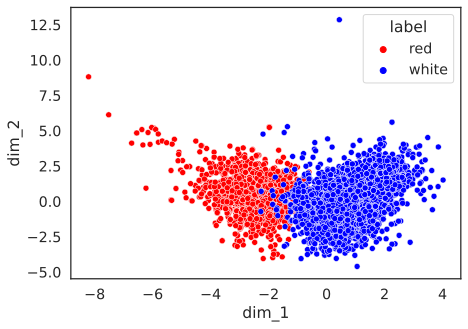

In [85]:
sns.set(rc={'figure.figsize':(7, 5), 'font.family': [FONT_FAMILY]}, style='white')
with sns.plotting_context("notebook", font_scale=FONT_SCALE):
    sns.scatterplot(data = low_dimensional_data,
                    x = 'dim_1', y = 'dim_2',
                    hue = 'label',
                    palette=['red', 'blue'])